In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from google.colab import files
import io

In [2]:
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [5]:
data = pd.read_csv("winequality-red.csv")
data.info()

print("Võ Thành Hoàng Phúc - 6351071056")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Võ Thành Hoàng Phúc - 6351071056


# Câu 3

=== Pearson Correlation Matrix ===
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
quality                    0.124052         -0.390558     0.226373   

                      residual sugar  chlorides  free 

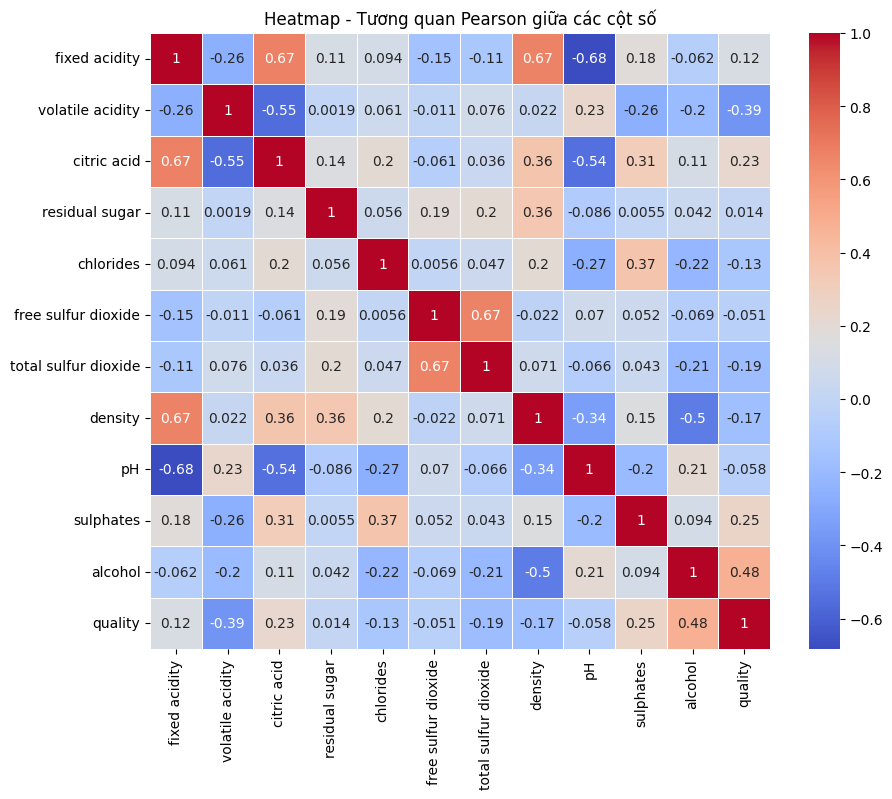

Võ Thành Hoàng Phúc - 6351071056


In [6]:
# 1. Lọc các cột dạng số để tính Pearson
numeric_cols = data.select_dtypes(include=['int64', 'float64'])

# 2. Tính ma trận tương quan Pearson
corr_matrix = numeric_cols.corr(method='pearson')

print("=== Pearson Correlation Matrix ===")
print(corr_matrix)

# 3. Vẽ heatmap bằng seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap - Tương quan Pearson giữa các cột số")
plt.show()

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 4

In [7]:
# Tách cột quyết định (Income) ra biến labels
labels = data['quality']

# Tách phần còn lại làm features
features = data.drop(columns=['quality'])

# Kiểm tra kết quả
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

print("\nFeatures columns:")
print(features.columns)

print("\nLabel samples:")
print(labels.head())

print("Võ Thành Hoàng Phúc - 6351071056")

Features shape: (1599, 11)
Labels shape: (1599,)

Features columns:
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

Label samples:
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64
Võ Thành Hoàng Phúc - 6351071056


# Câu 5

In [8]:
features.select_dtypes(exclude=['int64']).columns
print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [9]:
# Chuyển các cột dạng object sang one-hot vector
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [10]:
features_onehot

,fixed acidity_4.6,fixed acidity_4.7,fixed acidity_4.9,fixed acidity_5.0,fixed acidity_5.1,fixed acidity_5.2,fixed acidity_5.3,fixed acidity_5.4,fixed acidity_5.5,fixed acidity_5.6,...,alcohol_13.0,alcohol_13.1,alcohol_13.2,alcohol_13.3,alcohol_13.4,alcohol_13.5,alcohol_13.566666666666698,alcohol_13.6,alcohol_14.0,alcohol_14.9
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Câu 6

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.3, random_state=42)

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


# Câu 7

In [13]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.5875
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.29      0.12      0.17        17
           5       0.62      0.69      0.65       195
           6       0.61      0.59      0.60       200
           7       0.45      0.44      0.45        61
           8       0.33      0.17      0.22         6

    accuracy                           0.59       480
   macro avg       0.38      0.33      0.35       480
weighted avg       0.58      0.59      0.58       480

Võ Thành Hoàng Phúc - 6351071056


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Võ Thành Hoàng Phúc - 6351071056


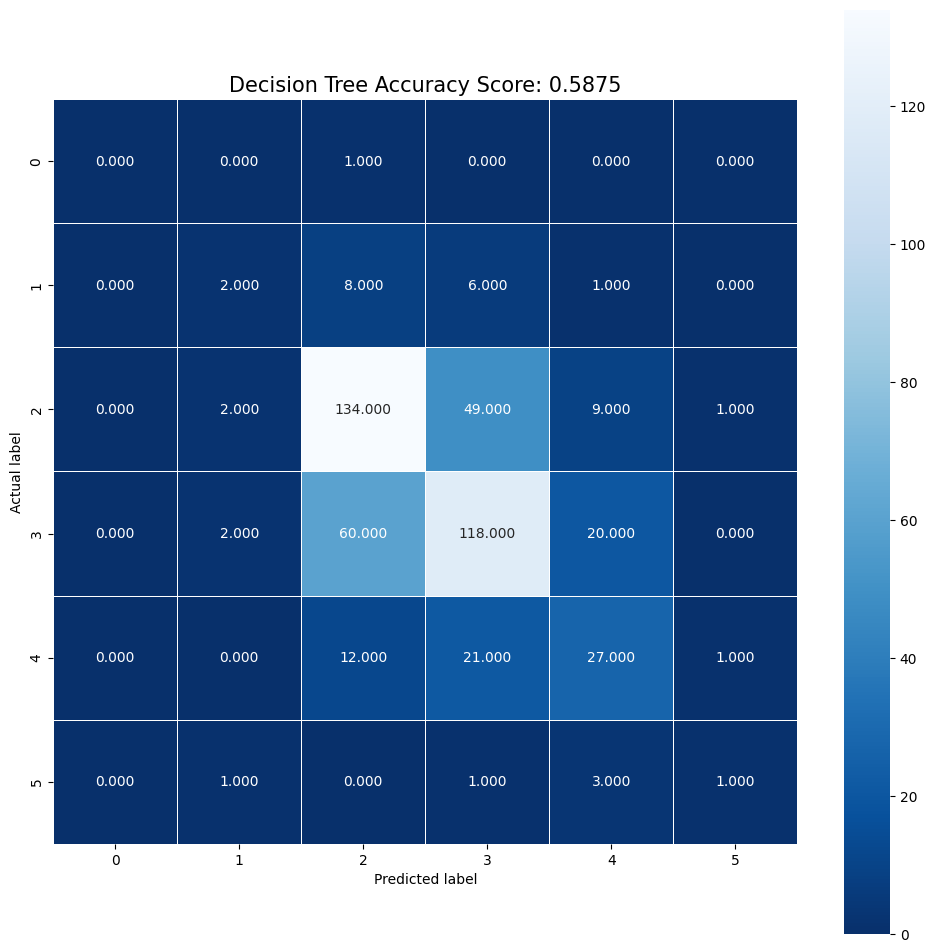

In [15]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

# Và biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 8


In [16]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [17]:
#Predict the response for test dataset
cart_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Accuracy:", cart_score)
print("Report:", metrics.classification_report(y_test, cart_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.5645833333333333
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.06      0.07        17
           5       0.62      0.73      0.67       195
           6       0.56      0.51      0.53       200
           7       0.43      0.41      0.42        61
           8       1.00      0.17      0.29         6

    accuracy                           0.56       480
   macro avg       0.45      0.31      0.33       480
weighted avg       0.56      0.56      0.55       480

Võ Thành Hoàng Phúc - 6351071056


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Võ Thành Hoàng Phúc - 6351071056


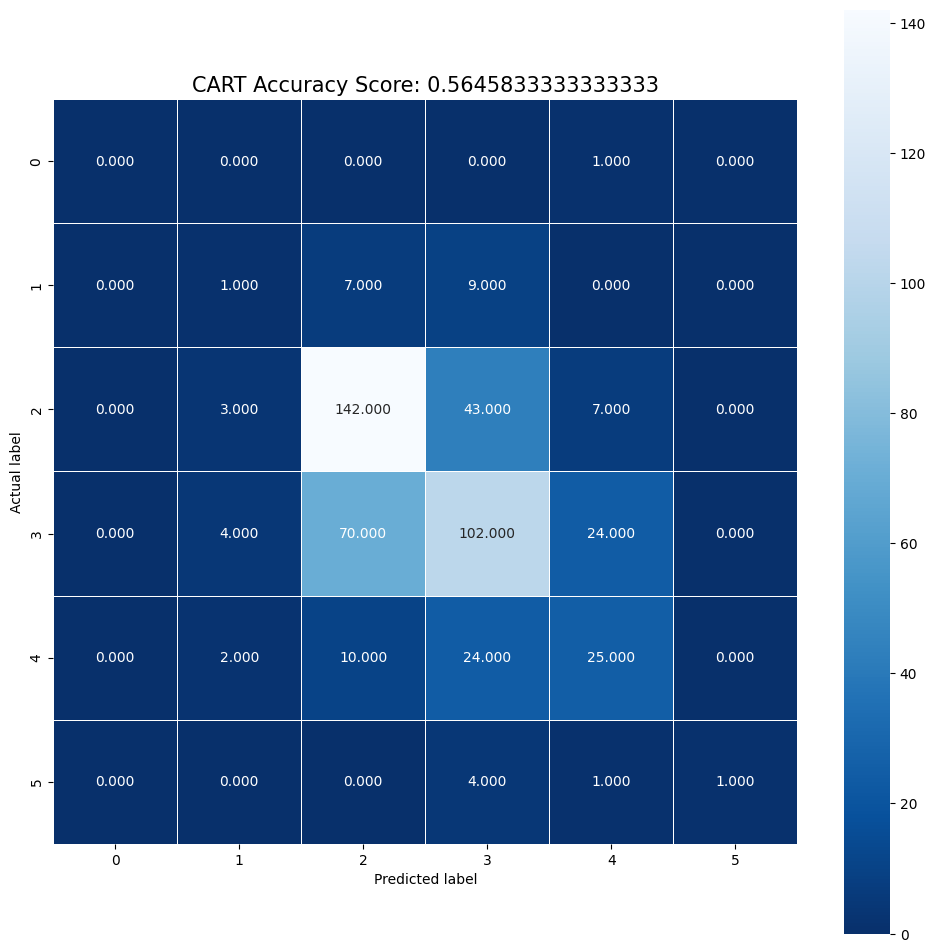

In [18]:
# Tính toán ma trận nhầm lẫn
cart_cm = metrics.confusion_matrix(y_test, cart_pred)

# Và biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'CART Accuracy Score: {0}'.format(cart_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 9

In [19]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [20]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.5583333333333333
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.70      0.46      0.56       195
           6       0.50      0.76      0.61       200
           7       0.51      0.41      0.45        61
           8       1.00      0.17      0.29         6

    accuracy                           0.56       480
   macro avg       0.45      0.30      0.32       480
weighted avg       0.57      0.56      0.54       480

Võ Thành Hoàng Phúc - 6351071056


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Võ Thành Hoàng Phúc - 6351071056


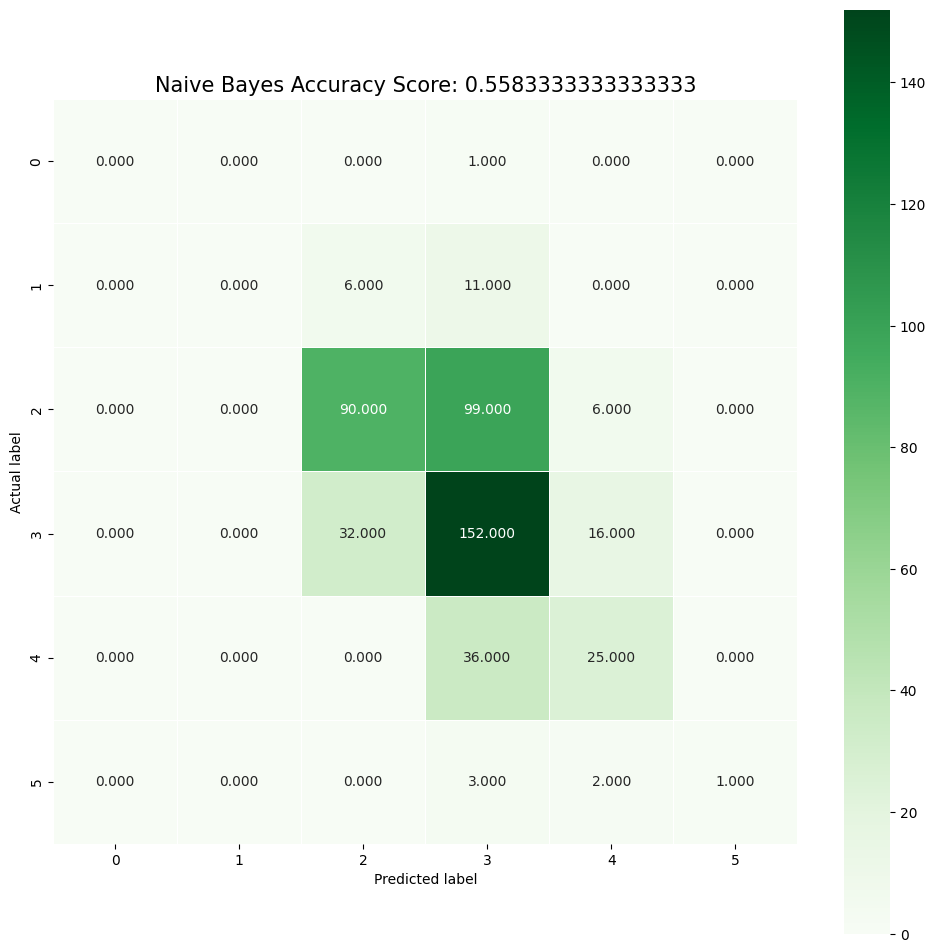

In [21]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 10

- So Sánh:
  - Decision Tree là mô hình tốt nhất trong ba mô hình. Nó đạt Accuracy (58.75%) và Weighted Avg F1-score (0.58) cao nhất.

  - Chỉ số Weighted Avg (trung bình có trọng số) bị ảnh hưởng nặng bởi các lớp đa số 5 và 6. Vì vậy, kết quả 0.58 chủ yếu phản ánh khả năng dự đoán hai lớp này.

  - CART và Naive Bayes có hiệu suất tổng thể thấp hơn và gần như tương đương nhau (Accuracy ~56%).